<a href="https://colab.research.google.com/github/pauNancy21/Tareas-Ciencia-Datos/blob/main/C%C3%B3digo_fuente_ASE_I_NPGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumna: Nancy Paulina González Reyes

No. de cuenta: 217374-6

In [1]:
#Se instalan las librerías que se van a utilizar
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
#Se importan las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io as io
import random 
import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [33]:
#Cargar los archivos
from google.colab import files
uploaded = files.upload()

Saving Analisis metro.csv to Analisis metro.csv


In [34]:
#Leer los archivos
analisismetro = pd.read_csv(io.BytesIO(uploaded['Analisis metro.csv']), sep = ',')

print('Base shape: ', analisismetro.shape)


Base shape:  (259, 12)


In [ ]:
# Forma de los datos
print('Datos shape: ', analisismetro.shape)
# Mostrar las primeros 4 filas del DataFrame concatenado
analisismetro.head(5)

Datos shape:  (259, 12)


,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor,sin-detenido
0,SAN PEDRO DE LOS PINOS,7,MARTES,19:30,00:46,TOCAMIENTO EN GLUTEO,ABUSO SEXUAL,MUJER,23,HOMBRE,32,NaN
1,OCEANIA,5,JUEVES,14:01,19:30,TOCAMIENTO EN GLUTEO,ABUSO SEXUAL,MUJER,31,HOMBRE,63,NaN
2,MERCED,1,LUNES,09:43,10:15,TOCAMIENTO EN GLUTEO,ABUSO SEXUAL,HOMBRE,18,HOMBRE,36,NaN
3,SANTA ANITA,8,LUNES,14:55,21:40,TOMA DE FOTOGRAFIAS,ACOSO SEXUAL,MUJER,27,HOMBRE,59,NaN
4,INSURGENTES,1,LUNES,16:36,17:35,TOCAMIENTO EN GLUTEO,ABUSO SEXUAL,MUJER,24,HOMBRE,50,SIN DETENIDO


In [ ]:
analisismetro.tail(5)

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor,sin-detenido
254,INDIOS VERDES,3,VIERNES,14:39,19:49,TOCAMIENTO EN AREA PUBICA,ABUSO SEXUAL,MUJER,29,HOMBRE,49,NaN
255,HIDALGO,2,LUNES,10:50,11:05,TOCAMIENTO EN GLUTEO,ACOSO SEXUAL,HOMBRE,37,HOMBRE,62,NaN
256,REFINERIA,7,LUNES,15:15,20:09,TOCAMIENTO EN SENO,ABUSO SEXUAL,MUJER,38,HOMBRE,36,NaN
257,DEPORTIVO 18 DE MARZO,3,VIERNES,19:42,05:09,TOCAMIENTO EN SENO,ABUSO SEXUAL,MUJER,25,HOMBRE,56,NaN
258,CHAPULTEPEC,1,VIERNES,16:42,20:05,TOCAMIENTO EN GLUTEO,ABUSO SEXUAL,MUJER,43,HOMBRE,62,NaN


In [ ]:
#tipo de datos
analisismetro.dtypes

estacion               object
linea                  object
dia                    object
hora-inicio-reporte    object
hora-fin-reporte       object
descripcion            object
delito                 object
sexo-victima           object
edad-victima            int64
sexo-agresor           object
edad-agresor            int64
sin-detenido           object
dtype: object

In [ ]:
analisismetro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   estacion             259 non-null    object
 1   linea                259 non-null    object
 2   dia                  259 non-null    object
 3   hora-inicio-reporte  259 non-null    object
 4   hora-fin-reporte     259 non-null    object
 5   descripcion          259 non-null    object
 6   delito               259 non-null    object
 7   sexo-victima         259 non-null    object
 8   edad-victima         259 non-null    int64 
 9   sexo-agresor         259 non-null    object
 10  edad-agresor         259 non-null    int64 
 11  sin-detenido         9 non-null      object
dtypes: int64(2), object(10)
memory usage: 24.4+ KB


In [ ]:
analisismetro.describe()

,edad-victima,edad-agresor
count,259.000000,259.000000
mean,27.011583,36.667954
std,9.677146,12.461638
min,10.000000,16.000000
25%,20.000000,27.500000
50%,25.000000,35.000000
75%,31.000000,45.000000
max,84.000000,73.000000


In [ ]:
#Mostrar el por ciento de los datos faltantes 
for column in analisismetro.columns:
    percentage = analisismetro[column].isnull().mean()
    print(f"{column}: {round(percentage*100, 2)}%")

estacion: 0.0%
linea: 0.0%
dia: 0.0%
hora-inicio-reporte: 0.0%
hora-fin-reporte: 0.0%
descripcion: 0.0%
delito: 0.0%
sexo-victima: 0.0%
edad-victima: 0.0%
sexo-agresor: 0.0%
edad-agresor: 0.0%
sin-detenido: 96.53%


In [ ]:
#Mejor visualización
analisismetro.isnull().sum().sort_values(ascending=False)

sin-detenido           250
estacion                 0
linea                    0
dia                      0
hora-inicio-reporte      0
hora-fin-reporte         0
descripcion              0
delito                   0
sexo-victima             0
edad-victima             0
sexo-agresor             0
edad-agresor             0
dtype: int64

Análisis Exploratorio de Datos

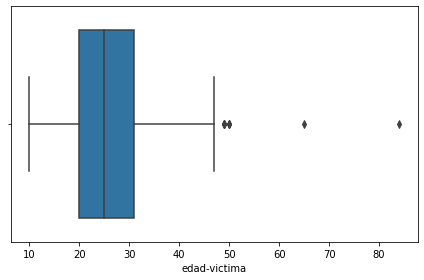

In [ ]:
#Valores atípicos
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=analisismetro["edad-victima"])
fig.tight_layout()

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

<Figure size 432x324 with 0 Axes>

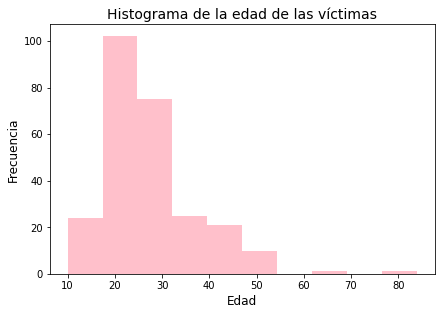

In [ ]:
#Gráfica de la edad de las víctimas
plt.figure(figsize=(6, 4.5)) 
fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.hist(datos["edad-victima"].fillna(0).astype(float))
plt.hist(analisismetro["edad-victima"],color='pink')
fig.tight_layout()
plt.title(('Histograma de la edad de las víctimas'),fontsize= 14)
plt.xlabel('Edad',fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)



In [ ]:
analisismetro.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


edad-victima    27.011583
edad-agresor    36.667954
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


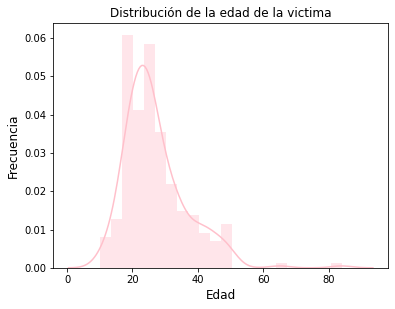

In [ ]:
#Grafica de la distribución de observaciones por la edad
plt.figure(figsize=(6, 4.5)) 
sns.distplot(analisismetro['edad-victima'], color = 'pink')

#Títulos y ejes
plt.title('Distribución de la edad de la victima', fontsize = 12)
plt.xlabel('Edad',fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

#plt.savefig('age_distribution.png')
plt.show()

In [ ]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
age_distr = pd.DataFrame(analisismetro['edad-victima'].describe())
# Transpose index and columns.
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
edad-victima,259.0,27.011583,9.677146,10.0,20.0,25.0,31.0,84.0


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

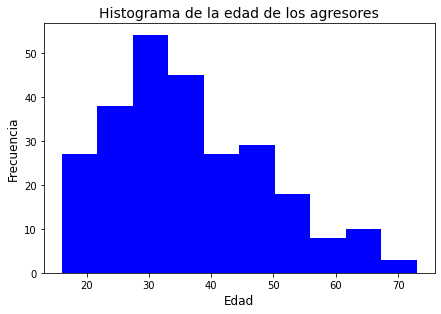

In [ ]:
#Gráfica de la edad del agresor
fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.hist(datos["edad-victima"].fillna(0).astype(float))
plt.hist(analisismetro["edad-agresor"],color='blue')
fig.tight_layout()
plt.title(('Histograma de la edad de los agresores'),fontsize= 14)
plt.xlabel('Edad',fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


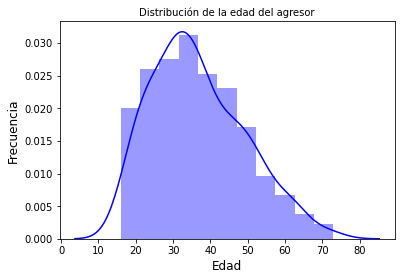

In [ ]:
#Grafica de la distribución de observaciones por la edad
sns.distplot(analisismetro['edad-agresor'], color = 'blue')

#Títulos y ejes
plt.title('Distribución de la edad del agresor', fontsize = 10)
plt.xlabel('Edad',fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

#plt.savefig('age_distribution.png')
plt.show()

In [ ]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
age_distr = pd.DataFrame(analisismetro['edad-agresor'].describe())
# Transpose index and columns.
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
edad-agresor,259.0,36.667954,12.461638,16.0,27.5,35.0,45.0,73.0


<Figure size 1008x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


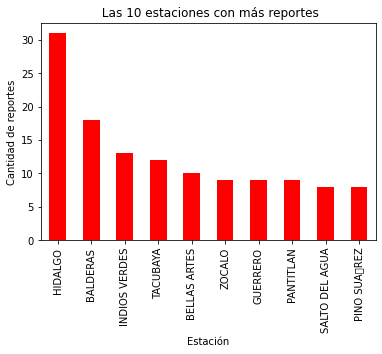

<Figure size 1008x720 with 0 Axes>

In [ ]:
rel_est_hor = analisismetro['estacion'].value_counts()
my_plot = rel_est_hor.head(10).plot(color='red',kind="bar")

plt.title(' Las 10 estaciones con más reportes', fontsize = 12)
plt.ylabel('Cantidad de reportes')
plt.xlabel('Estación')
plt.figure(figsize=(14,10))


Text(0.5, 0, 'Estación y línea')

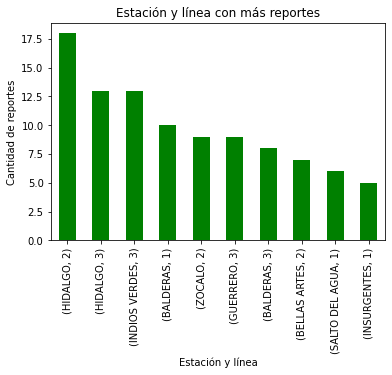

In [ ]:
my_plot = analisismetro[['estacion','linea']].value_counts().head(10).plot(color='green',kind='bar')
plt.title('Estación y línea con más reportes', fontsize = 12)
plt.ylabel('Cantidad de reportes')
plt.xlabel('Estación y línea')

Text(0.5, 0, 'Días')

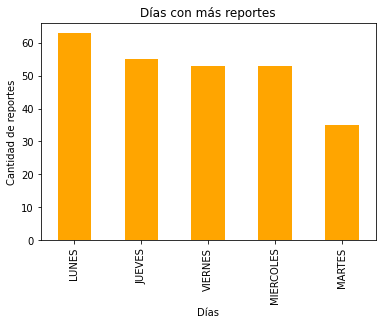

In [ ]:
myplot = analisismetro['dia'].value_counts().plot(color='orange',kind='bar')
plt.title('Días con más reportes', fontsize = 12)
plt.ylabel('Cantidad de reportes')
plt.xlabel('Días')

Text(0.5, 0, 'Estación y día')

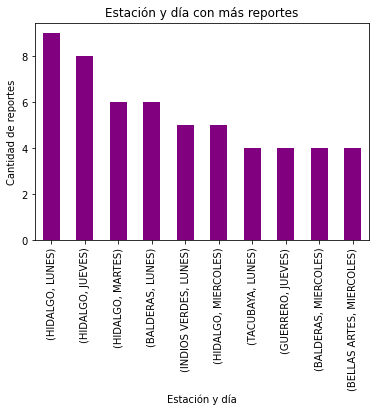

In [ ]:
my_plot = analisismetro[['estacion','dia']].value_counts().head(10).plot(color='purple',kind='bar')
plt.title('Estación y día con más reportes', fontsize = 12)
plt.ylabel('Cantidad de reportes')
plt.xlabel('Estación y día')

Text(0.5, 0, 'Delito')

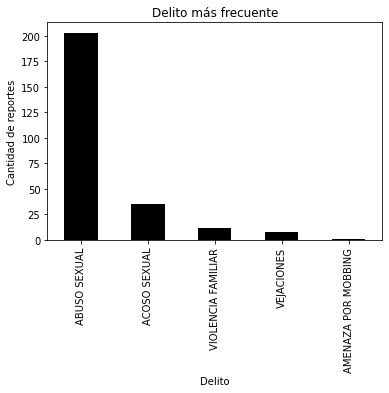

In [ ]:
myplot = analisismetro['delito'].value_counts().head(10).plot(color='black',kind='bar')
plt.title('Delito más frecuente', fontsize = 12)
plt.ylabel('Cantidad de reportes')
plt.xlabel('Delito')


Text(0.5, 0, 'Descripción')

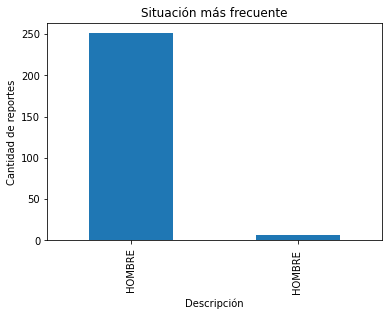

In [ ]:
myplot = analisismetro['sexo-agresor'].value_counts().head(2).plot(kind='bar')
plt.title('Situación más frecuente', fontsize = 12)
plt.ylabel('Cantidad de reportes')
plt.xlabel('Descripción')

Text(0.5, 0, 'Descripción')

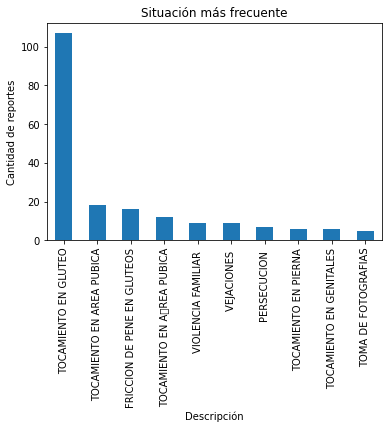

In [ ]:
myplot = analisismetro['descripcion'].value_counts().head(10).plot(kind='bar')
plt.title('Situación más frecuente', fontsize = 12)
plt.ylabel('Cantidad de reportes')
plt.xlabel('Descripción')

In [35]:
#Convertir strings a números
analisis_metro= analisismetro

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

analisis_metro['estacion'] = encoder.fit_transform(analisis_metro['estacion'])
analisis_metro['descripcion'] = encoder.fit_transform(analisis_metro['descripcion'])
analisis_metro['delito'] = encoder.fit_transform(analisis_metro['delito'])
analisis_metro['dia'] = encoder.fit_transform(analisis_metro['dia'])
analisis_metro['linea'] = encoder.fit_transform(analisis_metro['linea'])
analisis_metro['hora-inicio-reporte'] = encoder.fit_transform(analisis_metro['hora-inicio-reporte'])
analisis_metro['hora-fin-reporte'] = encoder.fit_transform(analisis_metro['hora-fin-reporte'])
analisis_metro['sexo-agresor'] = encoder.fit_transform(analisis_metro['sexo-agresor'])
analisis_metro['sexo-victima'] = encoder.fit_transform(analisis_metro['sexo-victima'])


In [ ]:
analisis_metro.describe()

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,39.976834,3.274131,1.945946,89.034749,96.969112,24.262548,0.420849,0.961390,27.011583,0.034749,36.667954
std,23.177764,2.899837,1.456399,55.742371,52.872589,10.289633,0.998308,0.193037,9.677146,0.203528,12.461638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,16.000000
25%,20.000000,2.000000,1.000000,38.500000,55.500000,19.000000,0.000000,1.000000,20.000000,0.000000,27.500000
50%,35.000000,3.000000,2.000000,85.000000,99.000000,25.000000,0.000000,1.000000,25.000000,0.000000,35.000000
75%,57.000000,5.000000,3.000000,136.500000,139.000000,25.000000,0.000000,1.000000,31.000000,0.000000,45.000000
max,82.000000,10.000000,4.000000,191.000000,189.000000,48.000000,4.000000,1.000000,84.000000,2.000000,73.000000


Text(0.5, 0, 'Reporte')

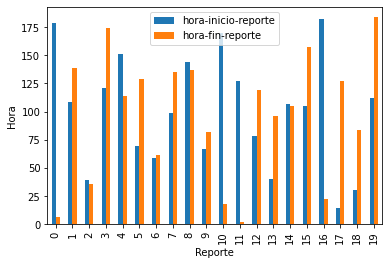

In [ ]:
analisis_metro.head(20)[['hora-inicio-reporte', 'hora-fin-reporte']].plot(kind='bar')
plt.ylabel('Hora')
plt.xlabel('Reporte')

In [ ]:
#analisis_metro = analisismetro.drop(['sin-detenido','edad-agresor','hora-inicio-reporte', 'hora-fin-reporte','dia'], axis=1)

In [36]:
analisis_metro = analisismetro.drop(['sin-detenido'], axis=1)

In [37]:
analisis_metro['tics-inicio'] = pd.to_numeric(analisis_metro['hora-inicio-reporte'])
analisis_metro['tics-fin'] = pd.to_numeric(analisis_metro['hora-fin-reporte'])

In [38]:
import datetime

In [ ]:
#analisis_metro.loc[(analisis_metro['hora-fin-reporte'] < analisis_metro['hora-inicio-reporte']) , 'hora-fin-reporte'] += datetime.timedelta(days=1)

TypeError: ignored

AGRUPAMIENTO

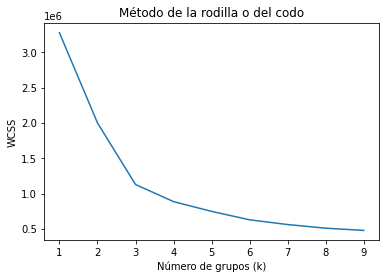

K:  3


In [44]:
# get all features except the class
data_clust = analisis_metro.loc[:, analisis_metro.columns != "class_label"]

wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300,
                  n_init = 10, random_state = 2022)
  kmeans.fit(data_clust)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)
plt.title("Método de la rodilla o del codo")
plt.xlabel("Número de grupos (k)")
plt.ylabel("WCSS")
plt.show()

kl = KneeLocator(range(1,10), wcss, curve="convex", direction="decreasing")
print("K: ", kl.elbow)

In [40]:
kmeans = KMeans(n_clusters=4,init="k-means++", max_iter=300,
                n_init=10,random_state=2022)
y_kmeans = kmeans.fit(data_clust)
print(kmeans.cluster_centers_)

[[4.39080460e+01 2.82758621e+00 1.87356322e+00 1.31758621e+02
  1.46804598e+02 2.61839080e+01 6.43678161e-01 1.00000000e+00
  2.76436782e+01 2.29885057e-02 3.74367816e+01 1.31758621e+02
  1.46804598e+02]
 [4.25797101e+01 3.57971014e+00 1.79710145e+00 3.80869565e+01
  1.15550725e+02 2.25797101e+01 2.02898551e-01 9.56521739e-01
  2.63768116e+01 7.24637681e-02 3.51594203e+01 3.80869565e+01
  1.15550725e+02]
 [3.30142857e+01 3.34285714e+00 1.98571429e+00 5.18000000e+01
  5.54000000e+01 2.44857143e+01 4.71428571e-01 9.28571429e-01
  2.66714286e+01 1.42857143e-02 3.79285714e+01 5.18000000e+01
  5.54000000e+01]
 [3.89393939e+01 3.66666667e+00 2.36363636e+00 1.61909091e+02
  1.49090909e+01 2.22424242e+01 1.81818182e-01 9.39393939e-01
  2.73939394e+01 3.03030303e-02 3.51212121e+01 1.61909091e+02
  1.49090909e+01]]


In [41]:
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(data_clust)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=["CP1","CP2"])
principalDf["labels"] = kmeans.labels_
principalDf

,CP1,CP2,labels
0,0.007297,3.103939,3
1,1.035700,-0.793955,0
2,-2.741137,0.351090,2
3,2.260694,-1.073731,0
4,1.400614,0.523691,0
...,...,...,...
254,1.128077,-0.248348,0
255,-1.859695,0.845989,2
256,1.708866,-0.490877,0
257,0.420070,3.241246,3


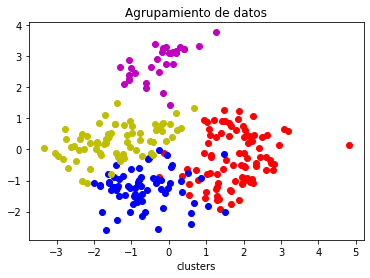

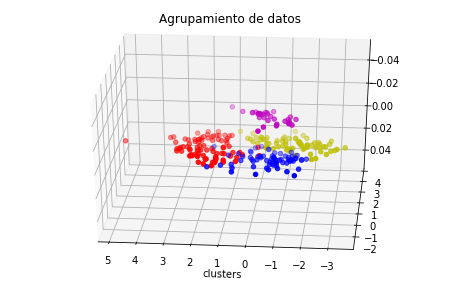

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]
cluster_3 = principalDf[principalDf["labels"] == 3]
cluster_4 = principalDf[principalDf["labels"] == 4]
#cluster_5 = principalDf[principalDf["labels"] == 5]

x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]

x_3 = cluster_3["CP1"]
y_3 = cluster_3["CP2"]

x_4 = cluster_4["CP1"]
y_4 = cluster_4["CP2"]

#x_5 = cluster_4["CP1"]
#y_5 = cluster_4["CP2"]


ax.scatter(x_0, y_0, c='r', marker='o')
ax.scatter(x_1, y_1, c='b', marker='o')
ax.scatter(x_2, y_2, c='y', marker='o')
ax.scatter(x_3, y_3, c='m', marker='o')
ax.scatter(x_4, y_4, c='pink', marker='o')
#x.scatter(x_5, y_5, c='brown', marker='o')
plt.title('Agrupamiento de datos', fontsize = 12)
plt.xlabel("clusters")
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

ax.scatter3D(x_0, y_0, c='r', marker='o')
ax.scatter3D(x_1, y_1, c='b', marker='o')
ax.scatter3D(x_2, y_2, c='y', marker='o')
ax.scatter3D(x_3, y_3, c='m', marker='o')
ax.scatter3D(x_4, y_4, c='pink', marker='o')
#ax.scatter3D(x_5, y_5, c='brown', marker='o')

plt.title('Agrupamiento de datos', fontsize = 12)
plt.xlabel("clusters")
ax.view_init(-150,85)
plt.show()

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor,tics-inicio,tics-fin
estacion,1.000000,-0.135944,0.007886,0.047698,0.084887,0.038446,0.051346,0.011928,0.103029,-0.090210,0.068265,0.047698,0.084887
linea,-0.135944,1.000000,-0.041448,-0.081802,-0.049165,0.001735,-0.101595,0.032830,0.059278,0.121710,-0.072123,-0.081802,-0.049165
dia,0.007886,-0.041448,1.000000,0.086678,-0.083930,-0.003446,0.013041,0.020121,0.008295,0.006361,0.018441,0.086678,-0.083930
hora-inicio-reporte,0.047698,-0.081802,0.086678,1.000000,0.085691,0.075636,0.070781,0.098462,0.069474,-0.040421,-0.000575,1.000000,0.085691
hora-fin-reporte,0.084887,-0.049165,-0.083930,0.085691,1.000000,0.063665,0.036523,0.118748,-0.000992,0.018830,0.016721,0.085691,1.000000
descripcion,0.038446,0.001735,-0.003446,0.075636,0.063665,1.000000,0.559341,0.007075,0.051896,-0.063599,-0.061224,0.075636,0.063665
delito,0.051346,-0.101595,0.013041,0.070781,0.036523,0.559341,1.000000,0.064532,0.155964,0.023127,0.043055,0.070781,0.036523
sexo-victima,0.011928,0.032830,0.020121,0.098462,0.118748,0.007075,0.064532,1.000000,0.095685,-0.064373,-0.250261,0.098462,0.118748
edad-victima,0.103029,0.059278,0.008295,0.069474,-0.000992,0.051896,0.155964,0.095685,1.000000,-0.090730,0.132838,0.069474,-0.000992
sexo-agresor,-0.090210,0.121710,0.006361,-0.040421,0.018830,-0.063599,0.023127,-0.064373,-0.090730,1.000000,-0.044336,-0.040421,0.018830


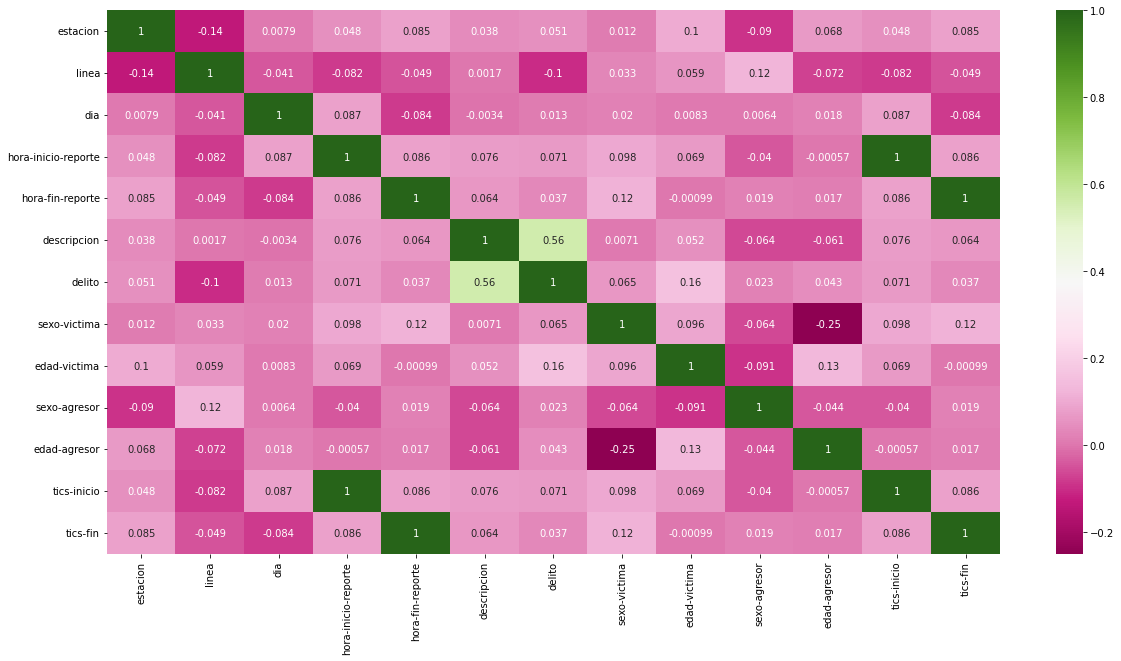

In [ ]:
plt.figure(figsize=(20,10))
c= analisismetro.corr()
sns.heatmap(c,cmap="PiYG",annot=True)
c

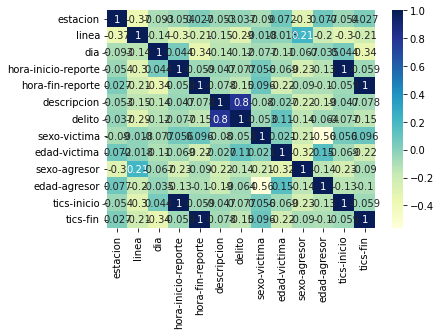

<Figure size 1440x720 with 0 Axes>

In [ ]:
corr_mat = data_clust.corr()
corr_mat
dataplot = sns.heatmap(corr_mat.corr(), cmap="YlGnBu", annot=True)
plt.figure(figsize=(20, 10))
# displaying heatmap
plt.show()

In [ ]:
# crear kmeans objeto 
kmeans = KMeans(n_clusters=4)
# ajustar kmeans objeto a datos 
kmeans.fit(data_clust)
# imprimir la ubicación de los clústeres aprendidos por el objeto 
#kmeans print(kmeans.cluster_centers_)
# guardar nuevos grupos para el gráfico 
y_km = kmeans.fit_predict(data_clust)

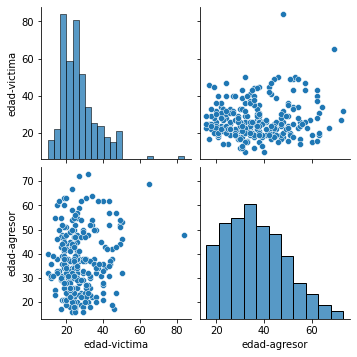

In [45]:
sns.pairplot(analisismetro[["edad-victima","edad-agresor"]])

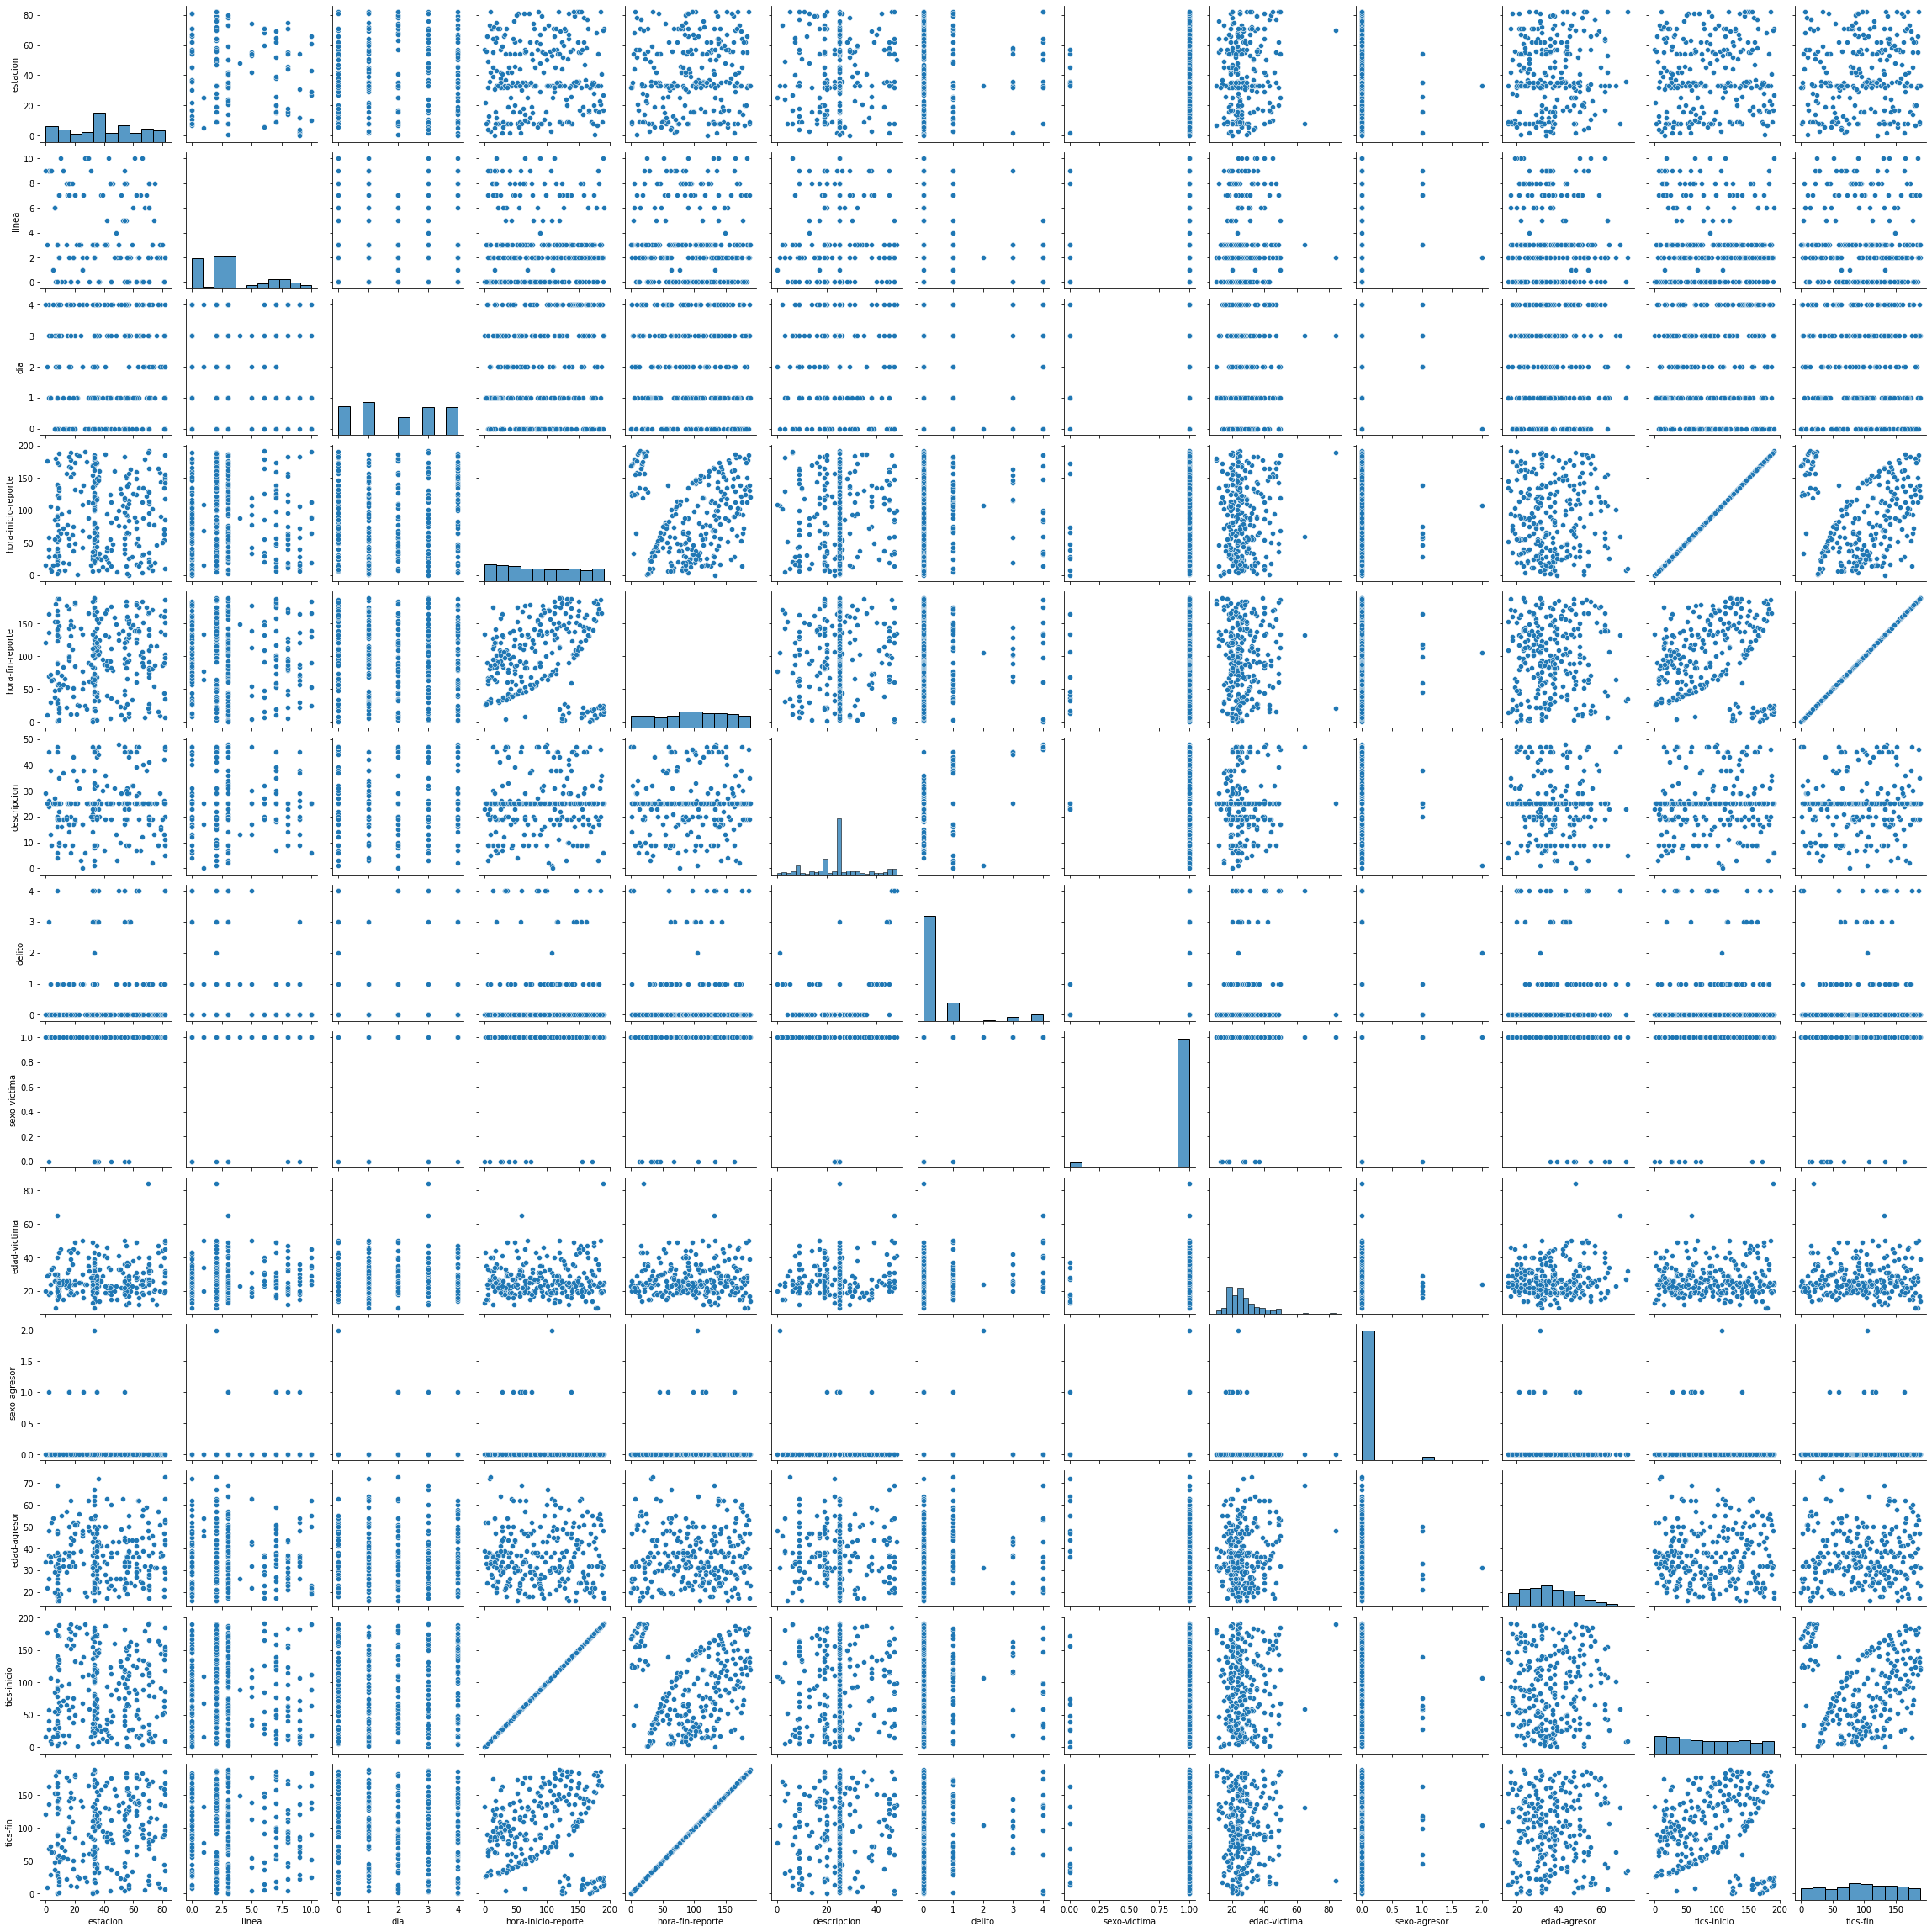

In [ ]:
sns.pairplot(analisismetro)

Predicción del comportamiento de la violencia en el metro de la CDMX

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Reportes delitos en el STC .csv to Reportes delitos en el STC .csv


In [4]:
reportemetro = pd.read_csv(io.BytesIO(uploaded['Reportes delitos en el STC .csv']), sep = ',')

# Forma de los datos
print('Base shape: ', reportemetro.shape)


Base shape:  (4, 8)


In [5]:
reportemetro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   delito  4 non-null      object 
 1   2015    4 non-null      int64  
 2   2016    4 non-null      int64  
 3   2017    4 non-null      int64  
 4   2018    4 non-null      int64  
 5   2019    3 non-null      float64
 6   2020    4 non-null      int64  
 7   2021    4 non-null      int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 384.0+ bytes


In [6]:
#Mejor visualización
reportemetro.isnull().sum().sort_values(ascending=False)

2019      1
delito    0
2015      0
2016      0
2017      0
2018      0
2020      0
2021      0
dtype: int64

In [7]:
reportemetro.head(5)

,delito,2015,2016,2017,2018,2019,2020,2021
0,total,162,245,234,176,440.0,217,332
1,abuso-sexual,127,202,195,149,383.0,169,270
2,hostigamiento-sexual,35,40,38,27,57.0,46,59
3,violacion,0,3,1,0,NaN,2,3


In [8]:
reportemetro.tail(5)

,delito,2015,2016,2017,2018,2019,2020,2021
0,total,162,245,234,176,440.0,217,332
1,abuso-sexual,127,202,195,149,383.0,169,270
2,hostigamiento-sexual,35,40,38,27,57.0,46,59
3,violacion,0,3,1,0,NaN,2,3


In [9]:
#Sustitur los valores por la media
#La media reemplaza los datos numéricos

mean = (reportemetro["2019"].mean())
reportemetro["2019"].fillna(mean, inplace=True)


In [10]:
#Mejor visualización
reportemetro.isnull().sum().sort_values(ascending=False)

delito    0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
dtype: int64

In [11]:
reportemetro.head(5)

,delito,2015,2016,2017,2018,2019,2020,2021
0,total,162,245,234,176,440.000000,217,332
1,abuso-sexual,127,202,195,149,383.000000,169,270
2,hostigamiento-sexual,35,40,38,27,57.000000,46,59
3,violacion,0,3,1,0,293.333333,2,3


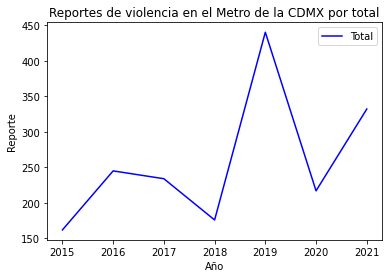

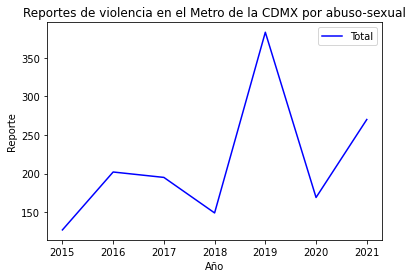

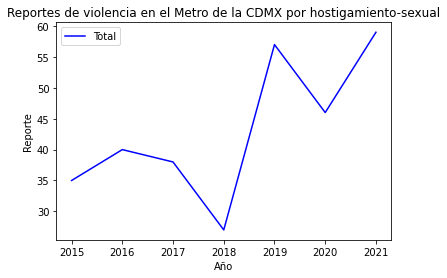

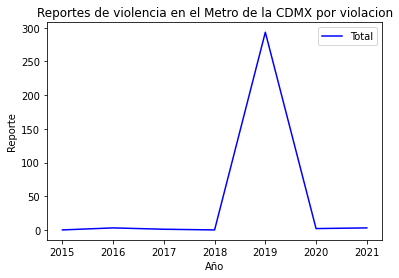

In [ ]:
#Se guardan en una lista los nombres de los delitos
reporte = reportemetro["delito"].tolist()
reporte1 = reporte [:30]
reporte2 = reporte[30:]

Años = list(range(2015, 2022))

X = Años
k = 0
#Ciclo para graficar las tendencias de reportes
for i in reporte1:

  Total = []
  
  #Ciclo para guardar en un arreglo los reportes de violencia, por año
  l = 1
  for j in Años:
    Total.append(reportemetro.iat[k, l])
    l+= 1

  #Se grafican las cantidades con una línea por cada una
  plt.figure()
  plt.plot(X, Total, '-b',label='Total')

  #Si la fila corresponde al total, se pone el nombre del país
  if (i=="Total"):
    plt.title("Reportes de violencia en el Metro de la CDMX")
  else:
    plt.title("Reportes de violencia en el Metro de la CDMX por %s" % i)

  plt.xlabel("Año")
  plt.ylabel("Reporte")

  plt.legend(loc='best')
  plt.show()

  k+=1

In [28]:
#Se crea un dataframe con los datos de los años y delitos
df = reportemetro
df = df[df.columns[pd.Series(df.columns).str.startswith(('2015','2016','2017','2018','2019','2020','2021'))]].copy()#Se guardan las columnas que contienen datos de feminicidios
df['delito'] = reportemetro['delito'].tolist() #Se copia la columna de las entidades

df = df.set_index('delito', drop = True) #Se asigna como índice la columna de las entidades
print(df.head())

df_delitos = df

                      2015  2016  2017  2018        2019  2020  2021
delito                                                              
total                  162   245   234   176  440.000000   217   332
abuso-sexual           127   202   195   149  383.000000   169   270
hostigamiento-sexual    35    40    38    27   57.000000    46    59
violacion                0     3     1     0  293.333333     2     3


Predicción para el año 2022

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
forecast = list()
est_dict = dict()

In [56]:
for i in range(len(df)):
  row = df.iloc[i].values
  model = SARIMAX(row)
  results = model.fit()
  forecast.append(round(results.predict(start=6,end=6,dynamic=True)[0]))

df["Predicción"] = forecast
df

,2015,2016,2017,2018,2019,2020,2021,Predicción
delito,,,,,,,,
total,162,245,234,176,440.000000,217,332,173
abuso-sexual,127,202,195,149,383.000000,169,270,129
hostigamiento-sexual,35,40,38,27,57.000000,46,59,43
violacion,0,3,1,0,293.333333,2,3,0


Text(0.5, 0, 'Días')

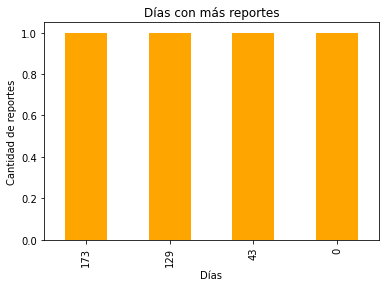

In [60]:
myplot = df['Predicción'].value_counts().plot(color='orange',kind='bar')
plt.title('Días con más reportes', fontsize = 12)
plt.ylabel('Cantidad de reportes')
plt.xlabel('Días')

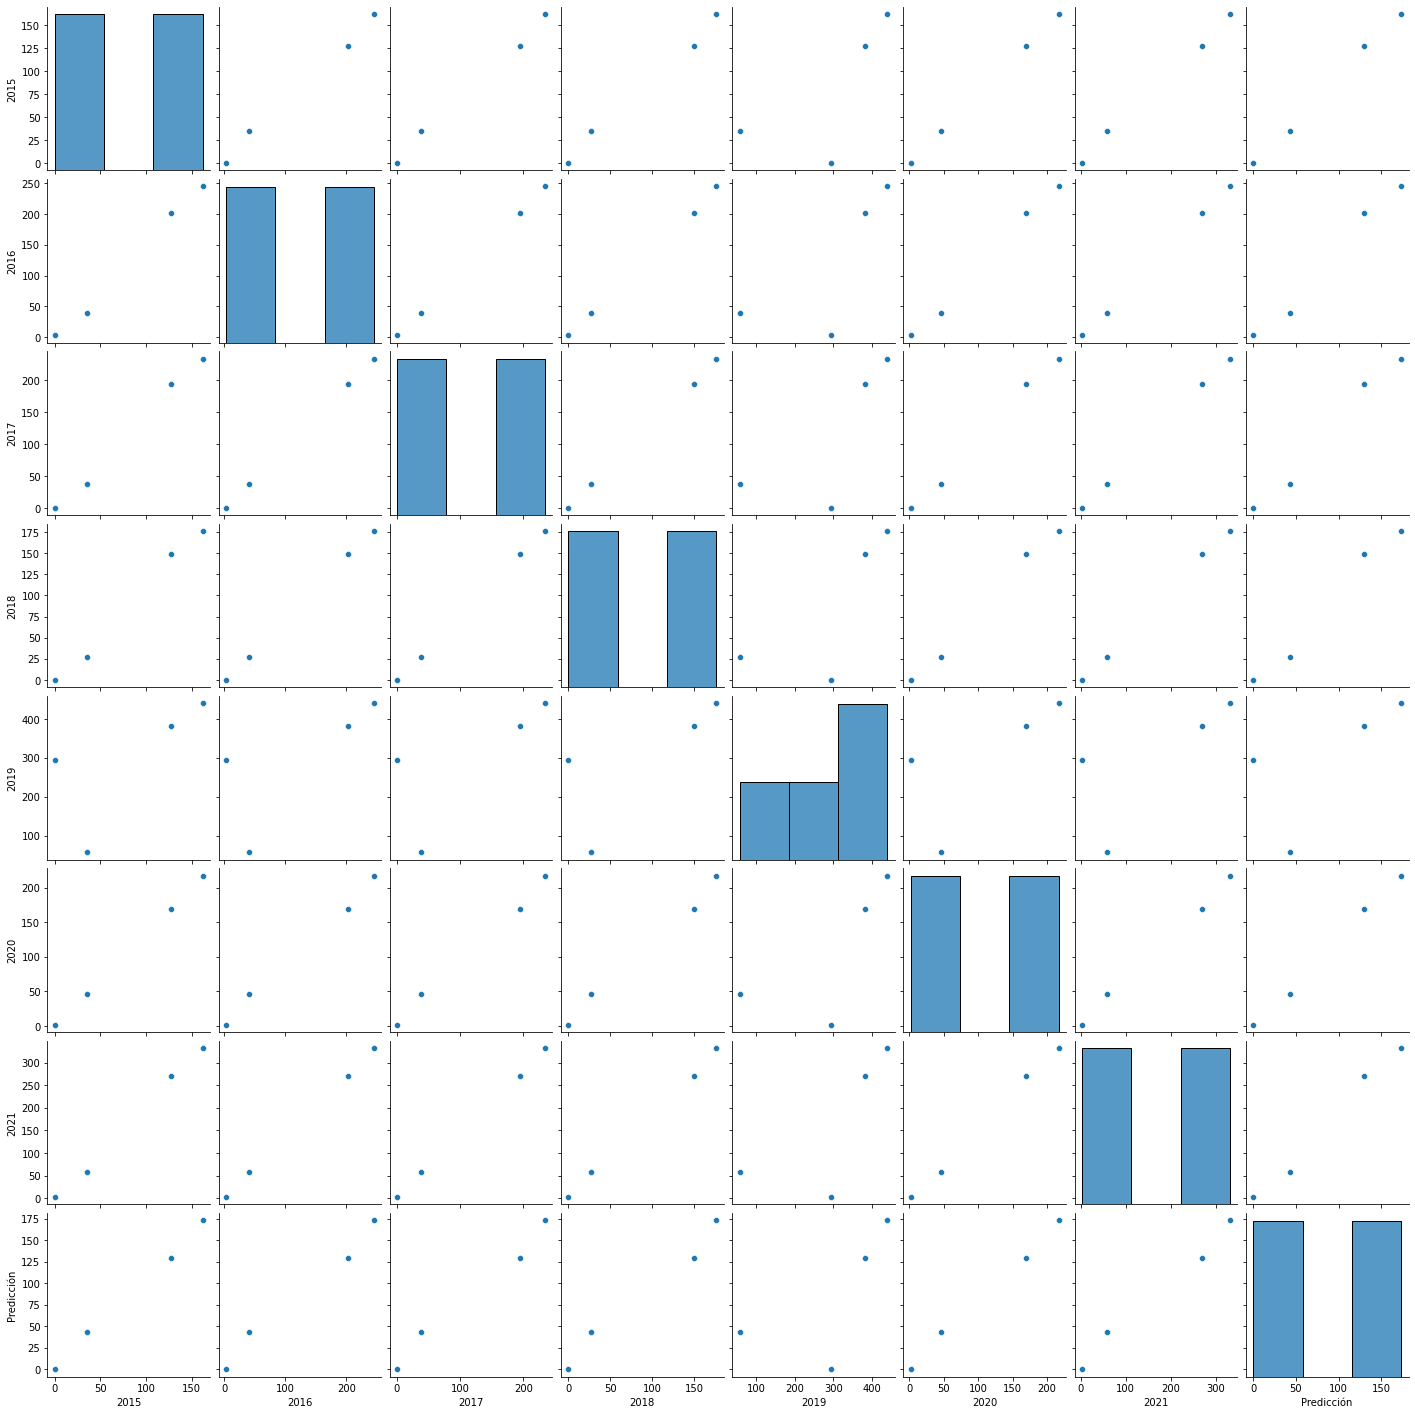

In [59]:
sns.pairplot(df)

In [31]:
df.describe()

,2015,2016,2017,2018,2019,2020,2021,Predicción
count,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,81.000000,122.50000,117.000000,88.000000,293.333333,108.500000,166.000000,90.250000
std,76.056996,118.90192,114.702514,87.426159,168.725286,101.128631,159.572345,82.890993
min,0.000000,3.00000,1.000000,0.000000,57.000000,2.000000,3.000000,0.000000
25%,26.250000,30.75000,28.750000,20.250000,234.250000,35.000000,45.000000,33.000000
50%,81.000000,121.00000,116.500000,88.000000,338.166667,107.500000,164.500000,90.000000
75%,135.750000,212.75000,204.750000,155.750000,397.250000,181.000000,285.500000,147.250000
max,162.000000,245.00000,234.000000,176.000000,440.000000,217.000000,332.000000,181.000000


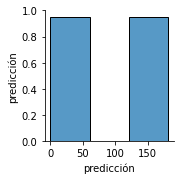

In [25]:
sns.pairplot(df[["predicci"]])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tiempo.csv to tiempo.csv


In [ ]:
tiempo = pd.read_csv(io.BytesIO(uploaded['tiempo.csv']), sep = ',')

# Forma de los datos
print('Base shape: ', tiempo.shape)

Base shape:  (259, 3)


In [ ]:
tiempo.head(6)

,hora-inicio-reporte,hora-fin-reporte,tiempo
0,07:30:00 p. m.,12:46:00 a. m.,05:16
1,02:01:00 p. m.,07:30:00 p. m.,05:29
2,09:43:00 a. m.,10:15:00 a. m.,00:32
3,02:55:00 p. m.,09:40:00 p. m.,06:45
4,04:36:00 p. m.,05:35:00 p. m.,00:59
5,10:59:00 a. m.,06:36:00 p. m.,07:37


In [ ]:
tiempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   hora-inicio-reporte  259 non-null    object
 1   hora-fin-reporte     259 non-null    object
 2   tiempo               259 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [ ]:
tiempo.describe()

,hora-inicio-reporte,hora-fin-reporte,tiempo
count,259,259,259
unique,192,190,196
top,09:00:00 a. m.,04:00:00 p. m.,01:05
freq,5,4,5


<Figure size 1008x720 with 0 Axes>

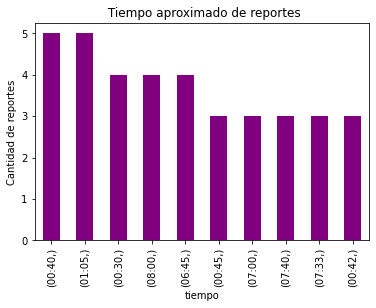

<Figure size 1008x720 with 0 Axes>

In [ ]:
my_plot = tiempo[['tiempo']].value_counts().head(10).plot(color='purple',kind='bar')

plt.title(' Tiempo aproximado de reportes', fontsize = 12)
plt.ylabel('Cantidad de reportes')
plt.xlabel('tiempo')
plt.figure(figsize=(14,10))